# 10 - Deep Learning

Machine Learning is a method of data analysis that automates analytical model building.
Using algorithms that interactively learn from data, machine learning allows computers to find hidden insights without being explicitly programmed where to look.
For computer vision are commonly used supervided learning algorithms, they are trained using labeled examples, such as an input where the desired output is known.
Supervised learning is commonly used where historical data predicts likely future events.
Image classification and recognition is a very common and widely applicable use of deep learning and machine learning with OpenCV and Keras. 

## Classification Metrics

The key classification metrics are:
- Accuracy: number of correct predictions made by the model divided by the total number of predictions (e.g. 0.8 or 80% accuracy). It's useful when target classes are well balanced (e.g. 50% dog and 50% cat on training data)
- Recall: Ability of a model to find all the relevant cases within a dataset. Number of true positives divided by the number of true positives + number of false negatives.
- Precision: Ability of a model to identify only the relevant data points. Number of the true positives divided by the number of true positives + the number of false positives.
- F1-Score: In the cases is necessary an optimal blend of precision and recall, F1-score combines these 2 metrics. F1 = 2*((p*r)/(p+r)).

A classification task can only achieve 2 results: correct or incorrect prediction.
Often there's a trade-off between Recall and Precision; while recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of data points our model says was relevant actually was relevant.

## Deep Learning

Deep Learning is based off perceptrons, a basic unit comparable to a biological neuron.
It has Dendrites in input and Axon on output, at the center there's the neuron body.
In there neuron body there's an activation function choosen for the specific purpose (sigmoid function, rectified linear unit, ...).
Cost functions are used to determine how far the neuron went respect the expected result.

## Keras

In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
data = genfromtxt('data/bank_note_data.txt',delimiter=',')

In [3]:
data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [4]:
labels = data[:,4]
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [5]:
features = data[:,0:4]
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [6]:
X = features
y = labels

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [8]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
# force data into a determined range
print(X_test.max())
print(X_test.min())

17.1116
-13.2869


In [11]:
scaler_object = MinMaxScaler()

In [12]:
scaler_object.fit(X_train)

MinMaxScaler()

In [13]:
scaled_X_train = scaler_object.transform(X_train)

In [14]:
scaled_X_test = scaler_object.transform(X_test)

In [15]:
scaled_X_train.max()

1.0000000000000002

In [16]:
scaled_X_train.min()

0.0

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()

model.add(
    Dense(
        # 4 neurons
        4,
        # input dimensions
        input_dim=4,
        # rectified linear unit activation function
        activation='relu'
    )
)

model.add(Dense(8,activation='relu'))

model.add(Dense(
    # 1 output
    1,
    # sigomoid activation functions results in 0 or 1
    activation='sigmoid'
    
))

C:\Users\Lorenzo Rottigni\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
model.fit(scaled_X_train,y_train,epochs=50,verbose=2)

Epoch 1/50
29/29 - 1s - 25ms/step - accuracy: 0.6366 - loss: 0.6753
Epoch 2/50
29/29 - 0s - 1ms/step - accuracy: 0.6583 - loss: 0.6685
Epoch 3/50
29/29 - 0s - 966us/step - accuracy: 0.6627 - loss: 0.6616
Epoch 4/50
29/29 - 0s - 903us/step - accuracy: 0.6649 - loss: 0.6545
Epoch 5/50
29/29 - 0s - 896us/step - accuracy: 0.6823 - loss: 0.6477
Epoch 6/50
29/29 - 0s - 966us/step - accuracy: 0.6921 - loss: 0.6407
Epoch 7/50
29/29 - 0s - 1ms/step - accuracy: 0.6877 - loss: 0.6334
Epoch 8/50
29/29 - 0s - 983us/step - accuracy: 0.6942 - loss: 0.6263
Epoch 9/50
29/29 - 0s - 935us/step - accuracy: 0.7040 - loss: 0.6189
Epoch 10/50
29/29 - 0s - 931us/step - accuracy: 0.7040 - loss: 0.6118
Epoch 11/50
29/29 - 0s - 895us/step - accuracy: 0.7095 - loss: 0.6039
Epoch 12/50
29/29 - 0s - 930us/step - accuracy: 0.7084 - loss: 0.5963
Epoch 13/50
29/29 - 0s - 931us/step - accuracy: 0.7160 - loss: 0.5895
Epoch 14/50
29/29 - 0s - 897us/step - accuracy: 0.7171 - loss: 0.5822
Epoch 15/50
29/29 - 0s - 914us/ste

In [22]:
# 99% of accuracy on training data

predict_x=model.predict(scaled_X_test) 
classes_x=np.argmax(predict_x,axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [23]:
classes_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
model.metrics_names

['loss', 'compile_metrics']

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

p = model.metrics_names

print(confusion_matrix(y_test,classes_x))
print(classification_report(y_test,classes_x))

[[257   0]
 [196   0]]
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.72       257
         1.0       0.00      0.00      0.00       196

    accuracy                           0.57       453
   macro avg       0.28      0.50      0.36       453
weighted avg       0.32      0.57      0.41       453



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MNIST Dataset

It is a famous dataset in machine learning that has 60k training images and 10k test images.
It contains handwritten single digits from 0 to 9 grayscaled, digit => black, bg => white.
The entire group of 60k images is a 4-dimensional array; 60k images of 1 channel 28x28 pixels.

## Convolutional Neural Networks

Differently from Densely connected nerual networks, Convolutional neural networks are necessary to effectively solve the problems that image data can present.
scalar => 3
vector => [3,4,5]
matrix => [[3,4],[5,6],[7,8]]
tensor => [[[1,2],[3,4],[[5,6],[7,8]]]

Tensors make it very convenient to feed in sets of images into out model (I,H,W,C):
- I => images
- H => Height of image in pixels
- W => Width of image in pixels
- C => Color channels, 1-Grayscale, 3_RGB

In [1]:
from keras.datasets import mnist

In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
single_img = X_train[0]

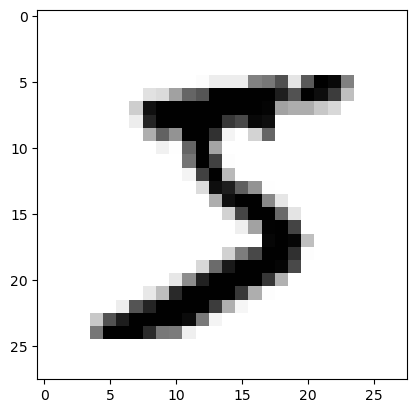

In [12]:
plt.imshow(single_img,cmap='gray_r')

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_train[0]

5

the neural network may interpret y values as a regression problem so it's necessary to one hot encode them

In [18]:
from keras.utils import to_categorical
y_cat_test = to_categorical(
    y_test,
    # 10 possible classes
    10
)
y_cat_train = to_categorical(y_train,10)

In [19]:
# 5th element is 1 representing 5
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [20]:
single_img.max()

255

In [23]:
X_train = X_train / X_train.max() #/255

In [24]:
X_test = X_test / X_test.max() #/255

In [25]:
# scaled 0 to 255 => 0 to 1
scaled_img = X_train[0]

In [27]:
scaled_img.max()

1.0

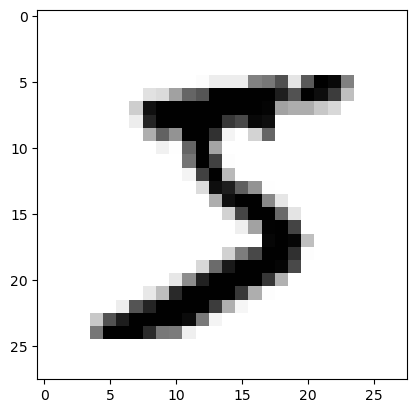

In [28]:
plt.imshow(scaled_img,cmap='gray_r')

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train = X_train.reshape(60000,28,28,1)

In [32]:
X_train.shape

(60000, 28, 28, 1)

In [33]:
X_test = X_test.reshape(10000,28,28,1)

In [34]:
X_test.shape

(10000, 28, 28, 1)

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [40]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28, 28, 1),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# from conv 2d to 1d understandable by dense layer
model.add(Flatten())
# Dense layer
model.add(Dense(128,activation='relu'))
# Layer output (classifier)
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [42]:
model.fit(X_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9069 - loss: 0.2997
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0509


In [43]:
model.metrics_names

['loss', 'compile_metrics']

In [44]:
model.evaluate(X_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.9826 - loss: 0.0547


[0.04513918235898018, 0.9868000149726868]

In [48]:
from sklearn.metrics import classification_report
import numpy as np
p = model.predict(X_test)
p = np.argmax(p,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [49]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### CIFAR-10 dataset

In [51]:
from keras.datasets import cifar10

In [53]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


In [55]:
# already formatted for 3 color channels
X_train.shape

(50000, 32, 32, 3)

In [56]:
X_train[0].shape

(32, 32, 3)

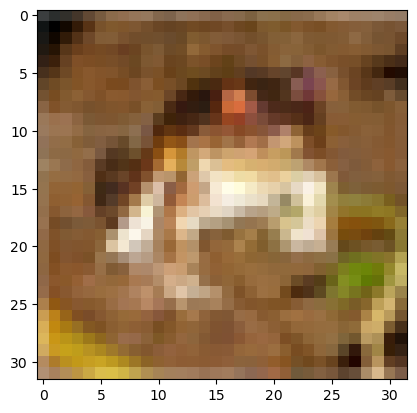

In [57]:
plt.imshow(X_train[0])

In [58]:
X_train.max()

255

In [59]:
X_train = X_train / 255
X_test = X_test / 255

In [60]:
X_test.shape

(10000, 32, 32, 3)

In [61]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [62]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [66]:
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

C:\Users\Lorenzo Rottigni\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.fit(X_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3577 - loss: 1.7639
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5733 - loss: 1.2155
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6356 - loss: 1.0451
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6886 - loss: 0.9022
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7205 - loss: 0.8118
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7482 - loss: 0.7352
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7706 - loss: 0.6713
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7885 - loss: 0.6157
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8074 - loss: 0.5614
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8200 - loss: 0.5347


In [68]:
model.metrics_names

['loss', 'compile_metrics']

In [69]:
model.evaluate(X_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6719 - loss: 1.2513


[1.2676432132720947, 0.6682999730110168]

In [71]:
p = model.predict(X_test)
p = np.argmax(p,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [73]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1000
           1       0.65      0.90      0.75      1000
           2       0.69      0.47      0.56      1000
           3       0.59      0.39      0.47      1000
           4       0.67      0.57      0.62      1000
           5       0.57      0.62      0.59      1000
           6       0.55      0.90      0.68      1000
           7       0.75      0.73      0.74      1000
           8       0.83      0.69      0.76      1000
           9       0.77      0.70      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000



### Deep Learning with custom images

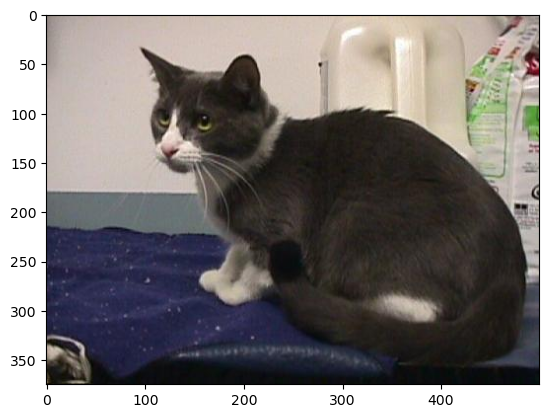

In [8]:
import cv2
cat4 = cv2.imread('data/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

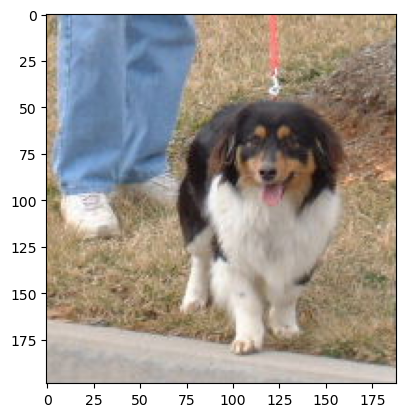

In [9]:
dog = cv2.imread('data/CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

image_gen = ImageDataGenerator(
    # randomly rotate images
    rotation_range=30,
    # stretch out image belong X axis
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

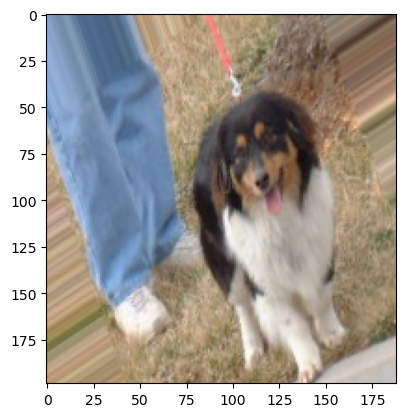

In [11]:
plt.imshow(image_gen.random_transform(dog))

In [12]:
image_gen.flow_from_directory('data/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [15]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [16]:
input_shape=(150,150,3)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Activation('relu'))

# reduces over fitting by randomly turning neurons off during training
model.add(Dropout(
    # 50% of neurons
    0.5
))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
batch_size=16

train_image_gen = image_gen.flow_from_directory(
    'data/CATS_DOGS/train',
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode='binary'
)

Found 18743 images belonging to 2 classes.


In [18]:
test_image_gen = image_gen.flow_from_directory(
    'data/CATS_DOGS/test',
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode='binary'
)

Found 6251 images belonging to 2 classes.


In [19]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [22]:
results = model.fit(
    train_image_gen,
    epochs=1,
    steps_per_epoch=150,
    validation_data=test_image_gen,
    validation_steps=12
)

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 150ms/step - accuracy: 0.5520 - loss: 0.6768 - val_accuracy: 0.6406 - val_loss: 0.6974


In [24]:
results.history['accuracy']

[0.5483061671257019]

## YOLO v3

Yolo (You Only Look Once) is an image detection algorithm, it can view an image and draw bounding boxes over what it perceives as identified classes.

It applies a single neural network to the full image, this network divides the image into regions and predicts bounding boxes and probabilities for each region. These bounding boxes are weighted by the predicted probabilities.

Yolo v3 has been trainer using COCO dataset that has over 1.5 million object instances with 80 different object categories.

https://github.com/xiaochus/YOLOv3